Opening BSCCM
Opened BSCCM
143166


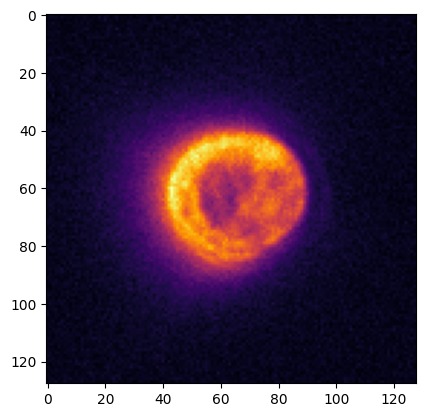

In [1]:
from bsccm import BSCCM
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.animation import FuncAnimation
from matplotlib import cm
from tqdm import tqdm


dataset = BSCCM('/Users/henrypinkard/Desktop/BSCCM')

valid_indices = dataset.get_indices()
an_index = valid_indices[1]
an_index = random.choice(valid_indices)
print(an_index)
image = dataset.read_image(an_index, channel='DF_50')
plt.imshow(image, cmap='inferno')

# Define the channels
channels = ['Brightfield',
            'DF_50',
            'DF_50_Bottom',
            'DF_50_Right',
            'DF_55',
            'DF_60',
            'DF_60_Bottom',
            'DF_60_Right',
            'DF_65',
            'DF_70',
            'DF_70_Bottom',
            'DF_70_Right',
            'DF_75',
            'DF_80',
            'DF_80_Bottom',
            'DF_80_Right',
            'DF_85',
            'DF_90',
            'DPC_Bottom',
            'DPC_Left',
            'DPC_Right',
            'DPC_Top',
            'LED119']

340817
45363

MovieWriter imagemagick unavailable; using Pillow instead.


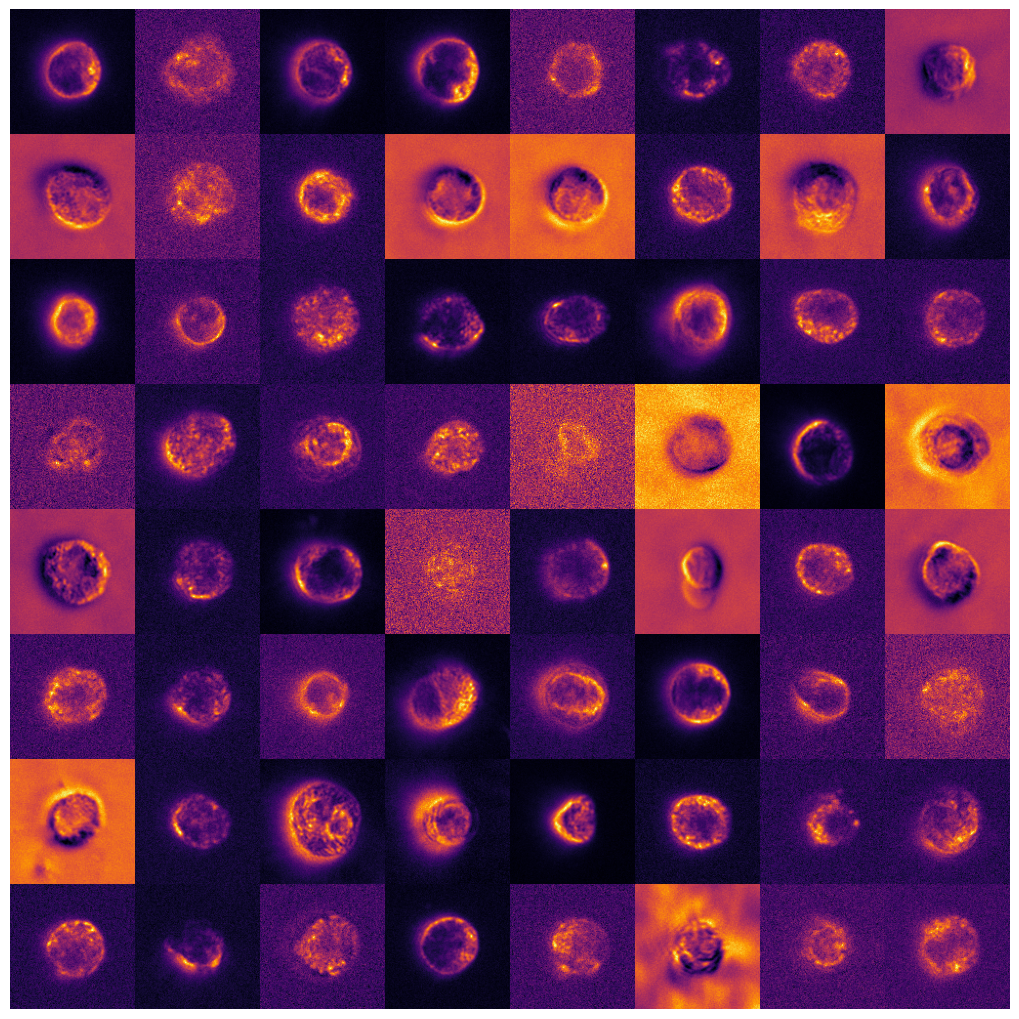

In [5]:

# Select indices for the 8x8 grid
valid_indices = dataset.get_indices(shuffle=True, seed=123)
grid_indices = valid_indices[:64]  # Adjust as needed


# Function to convert an image to RGB using the inferno colormap
def to_rgb(image):
    colormap = cm.inferno
    normed_data = (image - np.min(image)) / (np.max(image) - np.min(image))
    mapped_data = colormap(normed_data)
    return (mapped_data[:, :, :3] * 255).astype(np.uint8)

# Function to create a single frame
def create_frame(frame_num):
    # Initialize a large array to hold the stitched image
    grid_size = 128  # Assuming each cell image is 128x128
    stitched_image = np.zeros((grid_size * 8, grid_size * 8, 3), dtype=np.uint8)

    for i, idx in enumerate(grid_indices):
        # Choose a random channel for each cell
        channel = random.choice(channels)
        image = dataset.read_image(idx, channel=channel)

        # Convert to RGB
        rgb_image = to_rgb(image)

        # Determine position in grid
        row, col = divmod(i, 8)
        stitched_image[row * grid_size:(row + 1) * grid_size, col * grid_size:(col + 1) * grid_size] = rgb_image

    return stitched_image

def update(frame_num):
    frame = create_frame(frame_num)
    plt.imshow(frame)
    plt.axis('off')

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(np.zeros((8 * 128, 8 * 128, 3)), aspect='auto')  # Update the size based on your image dimensions
ax.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)


anim = FuncAnimation(fig, update, frames=20, interval=500)  # 20 frames, 500ms each

# Save the animation
anim.save('cell_montage_animation.gif', writer='imagemagick')


/var/folders/gp/g6n8kd2x39v3w7vlmqs9j82r0000gn/T/ipykernel_64305/4082791078.py:65: MatplotlibDeprecationWarning: The save_count attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later.
  with tqdm(total=anim.save_count) as pbar:
100%|██████████| 100/100 [24:56<00:00, 14.97s/it]


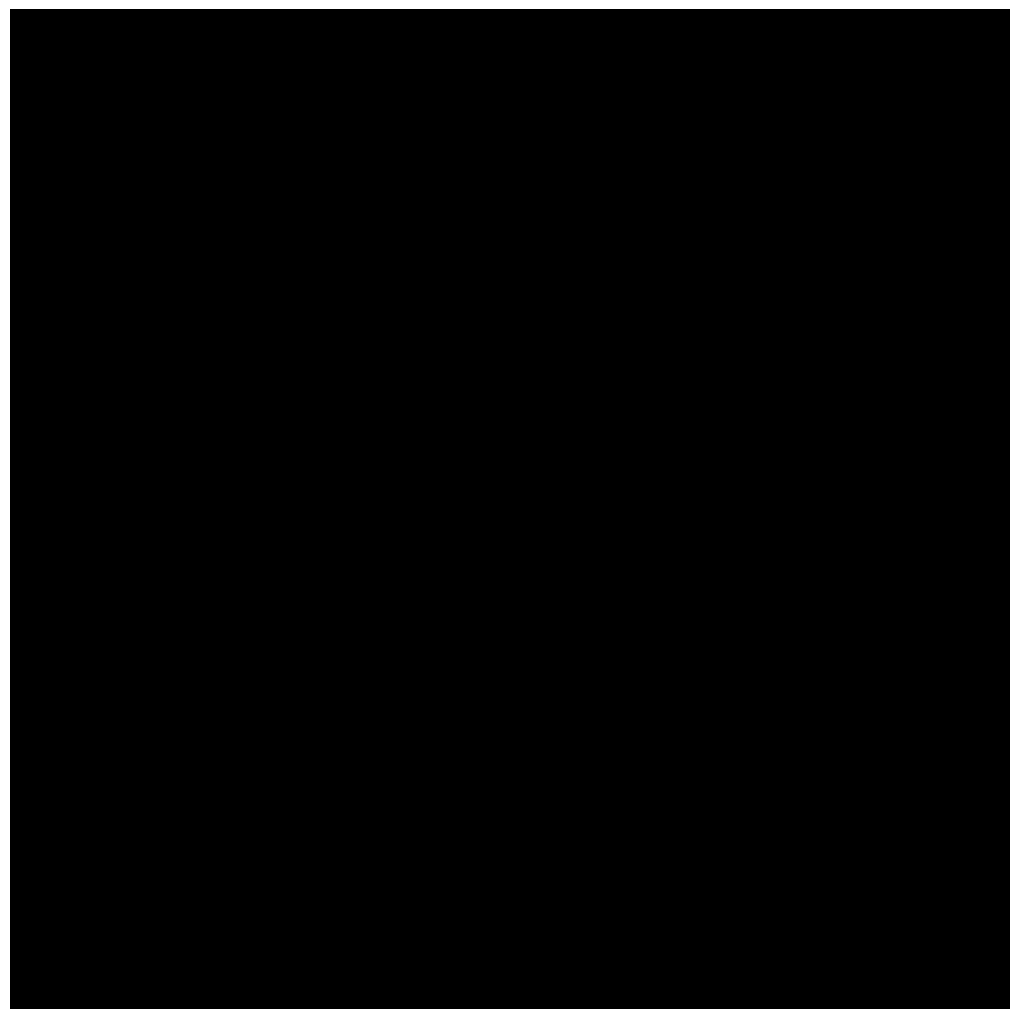

In [3]:

# Select indices for the maximum grid size
valid_indices = dataset.get_indices()
max_indices = len(valid_indices)
max_grid_size = 100  # Maximum grid size

image_size = 128  # Size of each cell's image in the montage

# Function to convert an image to RGB using the inferno colormap (from Version 1)
def to_rgb(image):
    colormap = cm.inferno
    normed_data = (image - np.min(image)) / (np.max(image) - np.min(image))
    mapped_data = colormap(normed_data)
    return (mapped_data[:, :, :3] * 255).astype(np.uint8)

# Function to create a single frame with zoom-out effect
import cv2  # Make sure you have OpenCV installed

def create_frame(frame_num):
    # Calculate current grid size (only odd numbers)
    grid_size = 2 * frame_num - 1
    full_montage_size = max_grid_size * image_size  # The size of the full montage
    single_image_size = full_montage_size // grid_size  # Size of each cell's image in the montage

    montage = np.zeros((full_montage_size, full_montage_size, 3), dtype=np.uint8)

    for row in range(grid_size):
        for col in range(grid_size):
            idx = valid_indices[(row * grid_size + col) % max_indices]
            channel = random.choice(channels)
            image = dataset.read_image(idx, channel=channel)

            # Convert to RGB and resize the image
            rgb_image = to_rgb(image)
            resized_image = cv2.resize(rgb_image, (single_image_size, single_image_size), interpolation=cv2.INTER_NEAREST)


            # Calculate position in montage
            montage_row = row * single_image_size
            montage_col = col * single_image_size

            # Place the resized image in the montage
            montage[montage_row:montage_row + single_image_size, montage_col:montage_col + single_image_size] = resized_image

    return montage



# Set up the figure for animation
fig, ax = plt.subplots(figsize=(10, 10))
# Placeholder for initial image, adjust size as needed
im = ax.imshow(np.zeros((max_grid_size * 128, max_grid_size * 128, 3)), aspect='auto')
ax.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)

# Animation update function
def update(frame_num):
    frame = create_frame(frame_num)
    im.set_array(frame)

# Create the animation
anim = FuncAnimation(fig, update, frames=max_grid_size, interval=500)

# Save the animation with tqdm progress bar
def save_animation(anim, filename, fps):
    with tqdm(total=anim.save_count) as pbar:
        def update_progress(*args):
            pbar.update()
        anim.save(filename, writer='imagemagick', fps=fps, progress_callback=update_progress)

save_animation(anim, 'cell_montage_animation_zoom_out.gif', 1.5)

/var/folders/gp/g6n8kd2x39v3w7vlmqs9j82r0000gn/T/ipykernel_97793/3741665953.py:34: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  mpl_image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8').reshape(int(height), int(width), 3)


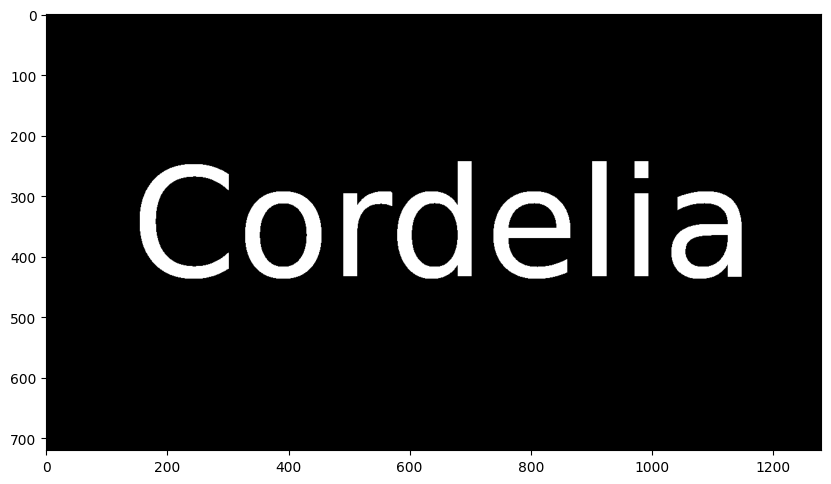

In [3]:


image = create_text_image()
image
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(image, cmap='gray')


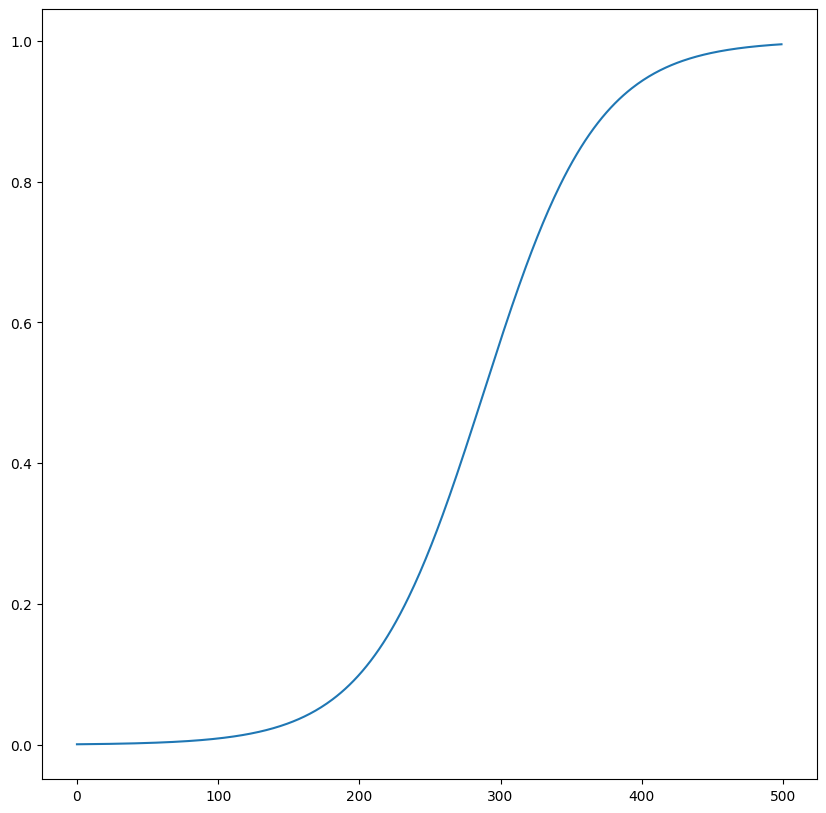

In [70]:
frame_num = np.arange(500)
sigmoid = 1 / (1 + np.exp(-frame_num / 40 + 7.2 ))

# make a sin wave that is very similar to the sigmoid
# sin = np.cos(frame_num / 47 - np.pi) / 2 + 0.5

#plot it
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.plot(sigmoid)
# im = ax.plot(sin)
# ax.set_ylim((0,10))
# temperature = (1 / sigmoid ** 2 - 1)* 1e-2 
# im = ax.plot(temperature)
# ax.set_ylim((0,1))


In [83]:
frame_num = np.arange(500)
(2 + 12 * (1 - np.sqrt(frame_num / num_frames))).astype(int)

array([14, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  5,  5,  5

/var/folders/gp/g6n8kd2x39v3w7vlmqs9j82r0000gn/T/ipykernel_97793/3906059365.py:34: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  mpl_image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8').reshape(int(height), int(width), 3)
/var/folders/gp/g6n8kd2x39v3w7vlmqs9j82r0000gn/T/ipykernel_97793/3906059365.py:216: MatplotlibDeprecationWarning: The save_count attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later.
  with tqdm(total=anim.save_count) as pbar:
100%|██████████| 500/500 [32:12<00:00,  3.87s/it]


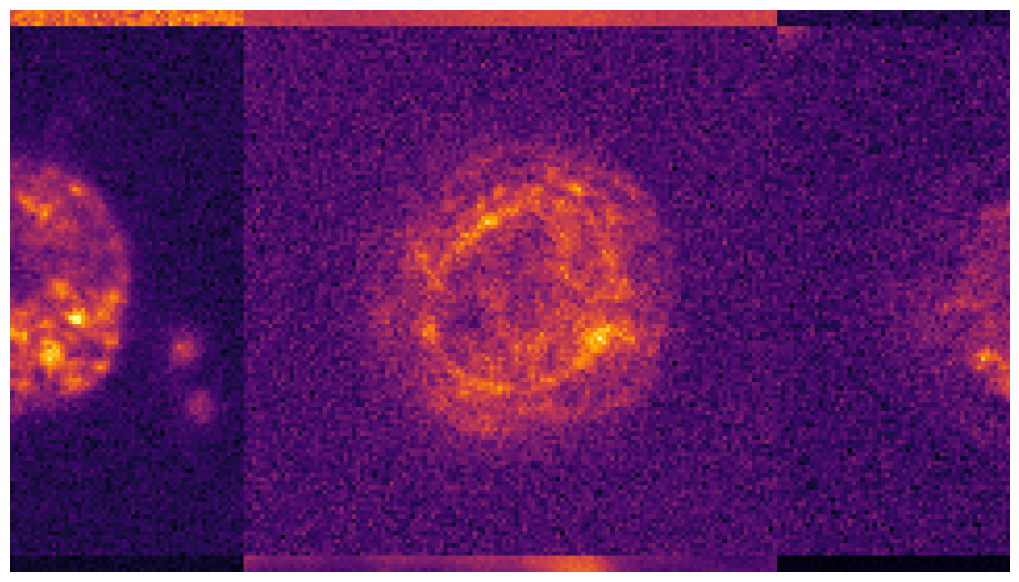

In [4]:
num_frames = 500  
resample_channels_every = 12

import numpy as np
from skimage import draw, color, transform
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import cv2

plt.rcParams['animation.ffmpeg_path'] = '/opt/homebrew/bin/ffmpeg'  # Path to ffmpeg

# meta_image_size = (600, 600)  # Height, Width
meta_image_size = (720, 1280)  # Height, Width


def create_text_image():
    # Create an image with specific dimensions
    img = np.zeros((meta_image_size[0], meta_image_size[1]), dtype=np.uint8)

    # Use matplotlib to draw text
    fig = plt.figure(figsize=(meta_image_size[1] / 100, meta_image_size[0] / 100), dpi=100)
    canvas = FigureCanvas(fig)
    ax = fig.gca()
    text = "Cordelia"
    ax.text(0.5, 0.5, text, fontsize=180, va='center', ha='center')

    # text = "BSCCM"
    # ax.text(0.5, 0.5, text, fontsize=240, va='center', ha='center')
    # ax.text(0.5, 0.5, text, fontsize=110, va='center', ha='center')
    ax.axis('off')

    canvas.draw()  # draw the canvas, cache the renderer
    width, height = fig.get_size_inches() * fig.get_dpi()
    mpl_image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8').reshape(int(height), int(width), 3)

    # Convert mpl_image to grayscale
    img = color.rgb2gray(mpl_image)
    img = transform.resize(img, meta_image_size, anti_aliasing=True)

    # Threshold the image to create a binary mask
    binary_mask = img < np.mean(img)  # Convert to binary (True for white, False for black)
    plt.close(fig)
    return binary_mask.astype(float)


# Assuming 'dataset' and 'channels' are defined earlier in your code

meta_image_index = 45363
meta_image = dataset.read_image(meta_image_index, channel='DF_50')

meta_image = create_text_image()


# Get the average intensity of each channel
channel_means = {}
valid_indices = dataset.get_indices()  # Moved up for use in channel_means calculation
for channel in channels:
    images = [dataset.read_image(i, channel=channel) for i in valid_indices[:15]]
    images = [(image - np.min(image)) / (np.max(image) - np.min(image)) for image in images]
    channel_means[channel] = np.median(np.array(images))

max_indices = len(valid_indices)

tile_size = 128  # Size of each cell's image in the montage

channels_from_raw_indices = {}


def to_rgb(image):
    colormap = cm.inferno
    normed_data = (image - np.min(image)) / (np.max(image) - np.min(image))
    mapped_data = colormap(normed_data)
    return (mapped_data[:, :, :3] * 255).astype(np.uint8)

def create_frame(frame_num):

    resample_channels_every = (2 + 12 * (1 - np.sqrt(frame_num / num_frames))).astype(int)

    # enforce max size
    max_width = 128 * tile_size
    max_height = max_width * meta_image.shape[0] / meta_image.shape[1]

    sigmoid = 1 / (1 + np.exp(-frame_num / 40 + 7.2 ))
    # sin = np.cos(frame_num / 94 - np.pi) / 2 + 0.5 + 1e-8


    unzoomed_image_height = tile_size + max_height * sigmoid
    unzoomed_image_shape = (unzoomed_image_height, unzoomed_image_height * meta_image.shape[1] / meta_image.shape[0])


    # unzoomed_image_shape = np.minimum(unzoomed_image_shape, (max_height, max_width))

    num_rows = int(np.ceil(unzoomed_image_shape[0] / tile_size))
    # make sure its odd
    num_rows += (num_rows + 1) % 2


    # make num_cols proportional given the meta_image aspect ratio
    # make num_cols proportional given the meta_image aspect ratio
    aspect_ratio = unzoomed_image_shape[1] / unzoomed_image_shape[0]
    num_cols = np.ceil(num_rows * aspect_ratio) 
    num_cols += (num_cols + 1) % 2 # make sure it is odd
    num_cols = int(num_cols)

    # Calculate the full montage size based on square tiles
    full_montage_height = num_rows * tile_size
    full_montage_width = num_cols * tile_size

    full_montage_size = np.array((full_montage_height, full_montage_width))


    temperature = (1 / sigmoid ** 2 - 1)* 1e-2 

    # Initialize the montage with zeros
    montage = np.zeros((*full_montage_size, 3), dtype=np.uint8)


    for row in range(num_rows):
        for col in range(num_cols):
            centered_row = row -  num_rows // 2
            centered_col = col -  num_cols // 2
            # hash to a valid index

            max_num_cols = 500

            raw_image_index = (centered_row * max_num_cols + centered_col) % max_indices

            # may be negative or positive. change so that it is positive and in range
            if raw_image_index < 0:
                raw_image_index = max_indices + raw_image_index
            image_index = raw_image_index % max_indices
            image_index = valid_indices[image_index]
            # print(centered_row, centered_col, image_index)


            x = col / num_cols
            y = row / num_rows
            x0 = int(x * meta_image.shape[1])
            y0 = int(y * meta_image.shape[0])
            x1 = int((x + 1 / num_cols) * meta_image.shape[1])
            y1 = int((y + 1 / num_rows) * meta_image.shape[0])
            region_mean = np.median(meta_image[y0:y1, x0:x1])
            region_mean = (region_mean - np.min(meta_image)) / (np.max(meta_image) - np.min(meta_image))


            sorted_channels = sorted(channels, key=lambda c: abs(channel_means[c] - region_mean))
            # generate a score for how close the channel mean is to the region mean
            scores = np.array([1 / (1e-5 + np.abs(channel_means[c] - region_mean)**4 ) for c in sorted_channels])
            scores += temperature * scores.max()
            
            probabilities = np.array(scores) / np.sum(scores)
            channel = np.random.choice(sorted_channels, p=probabilities)
            # channel = sorted_channels[0]

            if frame_num % resample_channels_every != 0:
                # replace channel with the same channel from the last frame
                if raw_image_index in channels_from_raw_indices:
                    channel = channels_from_raw_indices[raw_image_index]
            channels_from_raw_indices[raw_image_index] = channel
        

            image = dataset.read_image(image_index, channel=channel)
            rgb_image = to_rgb(image)

            # Calculate bounds for the image in the montage, handling fractional tiles
            montage_row_start = round(row * tile_size)
            montage_col_start = round(col * tile_size)
            montage_row_end = min(montage_row_start + tile_size, full_montage_size[0])
            montage_col_end = min(montage_col_start + tile_size, full_montage_size[1])

            # Resize the image to fit into the calculated space
            tile_height = montage_row_end - montage_row_start
            tile_width = montage_col_end - montage_col_start
            resized_image = cv2.resize(rgb_image, (tile_width, tile_height), interpolation=cv2.INTER_NEAREST)

            # Place the resized image in the montage
            montage[montage_row_start:montage_row_end, montage_col_start:montage_col_end] = resized_image

    # crop to the unzoomed image size by trimming edges
    limits = (int((montage.shape[0] - unzoomed_image_shape[0]) // 2),
                              -int((montage.shape[0] - unzoomed_image_shape[0]) // 2),
        int((montage.shape[1] - unzoomed_image_shape[1]) // 2), -int((montage.shape[1] - unzoomed_image_shape[1]) // 2))

    cropped_montage = montage[limits[0]:limits[1] if limits[1] != 0 else None
                              , limits[2]:limits[3] if limits[3] != 0 else None]
    
    # # resize the full montage to the meta image size, keeping the aspect ratio
    montage = cv2.resize(cropped_montage, (meta_image_size[1], meta_image_size[0]), interpolation=cv2.INTER_NEAREST)

    # make sure the shape is right
    assert montage.shape == meta_image_size + (3,)

    return montage


# # # imshow the frame
# x = create_frame(1)
# fig, ax = plt.subplots(figsize=(10, 10))
# im = ax.imshow(x)

fig, ax = plt.subplots(figsize=(10, 10 * meta_image_size[0] / meta_image_size[1]))

def update(frame_num):
    frame = create_frame(frame_num)
    # clear axes and plot the image
    ax.clear()
    ax.imshow(frame, aspect='equal')
    ax.axis('off')
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)

# update(6)

anim = FuncAnimation(fig, update, frames=num_frames, interval=500)

def save_animation(anim, filename, fps):
    with tqdm(total=anim.save_count) as pbar:
        def update_progress(*args):
            pbar.update()
        anim.save(filename, writer='imagemagick', fps=fps, progress_callback=update_progress)

save_animation(anim, 'cell_montage_animation_zoom_out_meta_cordelia.gif', 30)
# anim.save('cell_montage_animation_zoom_out_meta.mp4', writer='ffmpeg', fps=30)
